In [121]:
import numpy as np 
import pandas as pd 
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [122]:
labels=pd.read_csv("../input/traffic-signs-classification/labels.csv")
labels.head(45)

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [123]:
dic={}
for i in range(labels.shape[0]):
    dic[i]=labels.iloc[i]['Name']

In [124]:
print(dic)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vechiles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vechiles', 16: 'Vechiles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

In [125]:
labels[labels['Name']=='Turn right ahead'].index[0]

33

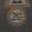

In [126]:
from PIL import Image
im = Image.open('../input/traffic-signs-classification/myData/0/00000_00000.jpg')
im

In [127]:
im.size

(32, 32)

In [128]:
from keras.preprocessing import image
x=[]
y=[]
for dirs in os.listdir('../input/traffic-signs-classification/myData'):
    for files in os.listdir("../input/traffic-signs-classification/myData/"+dirs):
        sign_img = np.array(image.load_img("../input/traffic-signs-classification/myData/"+dirs+"/"+files,target_size = (32,32)))
        x.append(sign_img)
        y.append(int(dirs))

In [129]:
x[0:1]

[array([[[26, 26, 24],
         [26, 26, 24],
         [26, 26, 24],
         ...,
         [24, 23, 29],
         [22, 21, 27],
         [20, 19, 25]],
 
        [[26, 26, 24],
         [26, 26, 24],
         [26, 26, 24],
         ...,
         [24, 23, 28],
         [22, 21, 27],
         [20, 19, 25]],
 
        [[26, 26, 24],
         [26, 26, 24],
         [26, 26, 24],
         ...,
         [24, 24, 26],
         [22, 21, 26],
         [20, 19, 24]],
 
        ...,
 
        [[29, 25, 22],
         [29, 25, 22],
         [26, 25, 21],
         ...,
         [25, 21, 18],
         [24, 20, 19],
         [23, 19, 18]],
 
        [[29, 25, 22],
         [29, 25, 22],
         [26, 25, 21],
         ...,
         [25, 21, 18],
         [24, 20, 19],
         [23, 19, 18]],
 
        [[29, 25, 22],
         [29, 25, 22],
         [26, 25, 21],
         ...,
         [25, 21, 18],
         [24, 20, 17],
         [23, 19, 18]]], dtype=uint8)]

In [130]:
y[0]

7

In [133]:
from sklearn.utils import shuffle
x_shuffled, y_shuffled = shuffle(x, y)


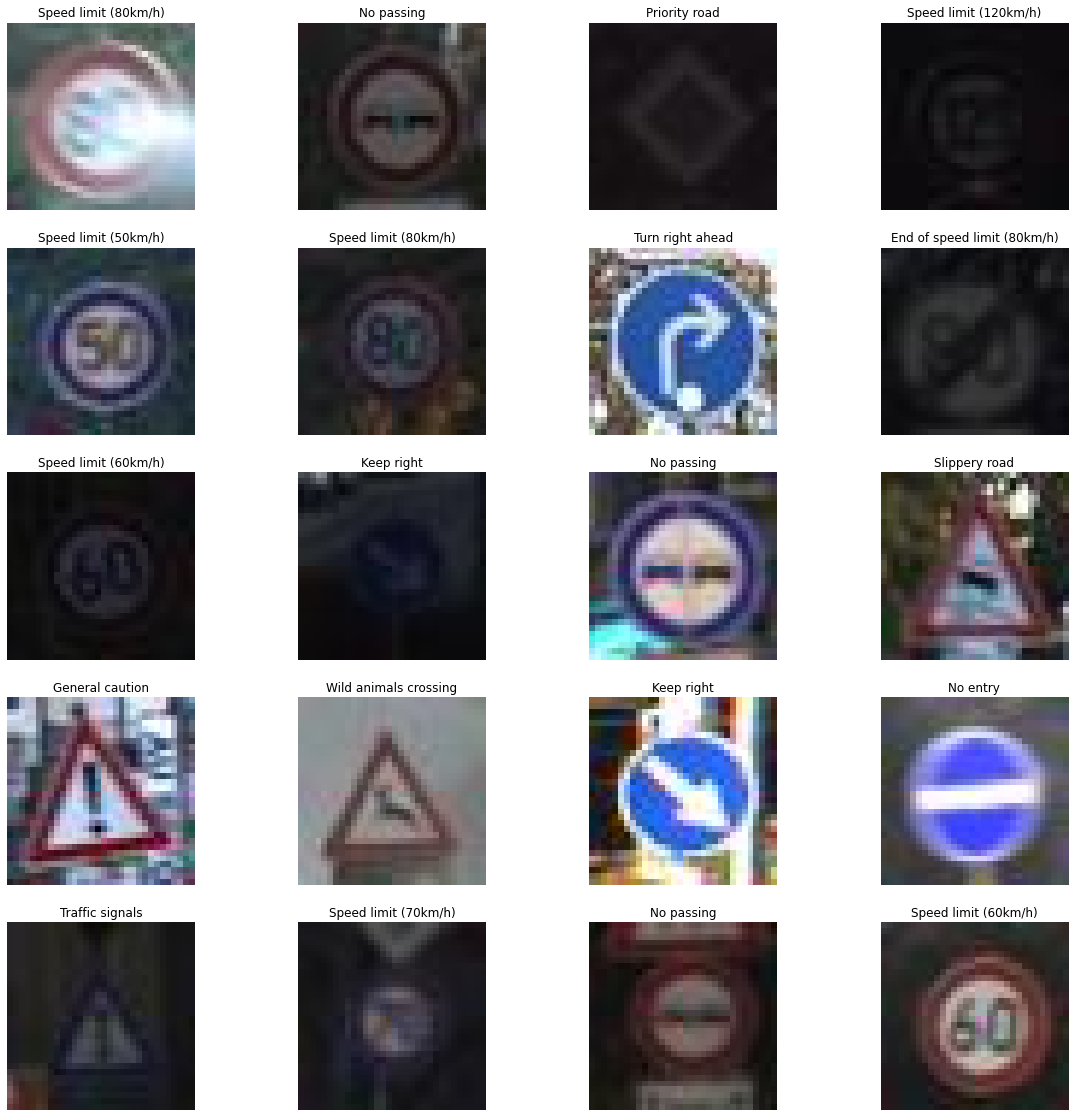

In [134]:
def plot_image(x,y, index):
    image = plt.imshow(x[index])
    l=plt.title(dic[y[index]])
    ax.grid(False)
    ax.axis('off')    
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(x_shuffled,y_shuffled, i)

plt.show()

In [135]:
x_shuffled[0].shape

(32, 32, 3)

In [136]:
len(y_shuffled)

73139

In [137]:
import keras
y_categorical = keras.utils.to_categorical(y_shuffled, 43)

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_rest,y_train,y_rest=train_test_split(x_shuffled,y_categorical,test_size=0.1)

In [139]:
x_test,x_val,y_test,y_val=train_test_split(x_rest,y_rest,test_size=0.5)

In [140]:
len(x_train),len(y_train)

(65825, 65825)

In [141]:
len(x_test),len(y_test)

(3657, 3657)

In [142]:
len(x_val),len(y_val)

(3657, 3657)

In [143]:
x_train[0]

array([[[13, 12, 10],
        [14, 13, 11],
        [14, 13, 11],
        ...,
        [12, 11,  9],
        [11, 10,  8],
        [10,  9,  5]],

       [[13, 12, 10],
        [13, 12, 10],
        [14, 13, 11],
        ...,
        [12, 11,  9],
        [12, 11,  9],
        [11, 10,  6]],

       [[13, 12, 10],
        [13, 12, 10],
        [14, 13, 11],
        ...,
        [13, 12, 10],
        [13, 12, 10],
        [13, 12, 10]],

       ...,

       [[12, 11,  7],
        [12, 11,  7],
        [12, 11,  7],
        ...,
        [12, 11,  9],
        [ 9,  8,  6],
        [ 7,  6,  4]],

       [[12, 11,  7],
        [12, 11,  7],
        [12, 11,  7],
        ...,
        [ 9,  8,  6],
        [ 9,  8,  6],
        [10,  9,  5]],

       [[12, 11,  7],
        [12, 11,  7],
        [12, 11,  7],
        ...,
        [ 7,  6,  4],
        [10,  9,  7],
        [13, 12,  8]]], dtype=uint8)

In [144]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [145]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD, RMSprop
import keras
import tensorflow as tf

In [146]:
vgg_model = VGG16(weights= 'imagenet', include_top=False, input_shape= (32,32,3))

In [147]:
model=keras.Sequential()
for layer in vgg_model.layers:
    model.add(layer)
for layer in model.layers:
    layer.trainable=False
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dense(43,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

In [148]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [149]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=6
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [150]:
x_train_array=np.array(x_train)
y_train_array=np.array(y_train)
x_train_scaled=x_train_array/255.0

In [151]:
x_train_scaled[1]

array([[[0.11764706, 0.10196078, 0.09803922],
        [0.11372549, 0.09803922, 0.09411765],
        [0.10980392, 0.09411765, 0.09019608],
        ...,
        [0.10588235, 0.0745098 , 0.06666667],
        [0.10588235, 0.0745098 , 0.06666667],
        [0.10196078, 0.07058824, 0.05882353]],

       [[0.11764706, 0.10196078, 0.09803922],
        [0.11372549, 0.09803922, 0.09411765],
        [0.10980392, 0.09411765, 0.09019608],
        ...,
        [0.09803922, 0.07843137, 0.06666667],
        [0.09411765, 0.0745098 , 0.0627451 ],
        [0.09411765, 0.0745098 , 0.05882353]],

       [[0.11764706, 0.10196078, 0.09803922],
        [0.11372549, 0.09803922, 0.09411765],
        [0.10980392, 0.09411765, 0.09019608],
        ...,
        [0.09019608, 0.0745098 , 0.07058824],
        [0.09019608, 0.0745098 , 0.0627451 ],
        [0.08627451, 0.07058824, 0.05882353]],

       ...,

       [[0.12941176, 0.07058824, 0.08235294],
        [0.11764706, 0.05882353, 0.07058824],
        [0.10980392, 0

In [152]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [153]:
x_val_array=np.array(x_val)
y_val_array=np.array(y_val)
x_val_scaled=x_val_array/1.0
x_val_scaled=x_val_scaled/255


In [154]:
x_val_scaled[0]

array([[[0.1372549 , 0.12941176, 0.13333333],
        [0.10588235, 0.09803922, 0.10196078],
        [0.05882353, 0.05098039, 0.05490196],
        ...,
        [0.10588235, 0.12156863, 0.15686275],
        [0.32941176, 0.34117647, 0.37647059],
        [0.29019608, 0.30196078, 0.3372549 ]],

       [[0.18039216, 0.17254902, 0.17647059],
        [0.11372549, 0.10588235, 0.10980392],
        [0.05098039, 0.04313725, 0.04705882],
        ...,
        [0.15686275, 0.17254902, 0.20784314],
        [0.25490196, 0.26666667, 0.30196078],
        [0.16862745, 0.16862745, 0.20784314]],

       [[0.2627451 , 0.25490196, 0.25882353],
        [0.14117647, 0.13333333, 0.1372549 ],
        [0.04313725, 0.03529412, 0.03921569],
        ...,
        [0.05882353, 0.07058824, 0.09803922],
        [0.10588235, 0.10588235, 0.14509804],
        [0.09803922, 0.09803922, 0.1372549 ]],

       ...,

       [[0.0745098 , 0.0745098 , 0.08235294],
        [0.05882353, 0.05882353, 0.06666667],
        [0.04313725, 0

In [155]:
y_train_array[0].shape

(43,)

In [156]:
# history =  model.fit(x_train_scaled, y_train_array,validation_data = (x_val_scaled, y_val_array), batch_size =256, epochs =50, verbose = 1, callbacks = [stop, checkpoint])

In [157]:
model.save("Vgg_traffic_model.h5")

In [158]:
model=keras.models.load_model("../input/vgg-traffic-sign-model/Vgg_traffic_model.h5")

In [159]:
x_test_array=np.array(x_test)
x_test_scaled=x_test_array/255.0

In [160]:
x_test_scaled[0]

array([[[0.16470588, 0.13333333, 0.12156863],
        [0.16078431, 0.14117647, 0.1254902 ],
        [0.16470588, 0.15294118, 0.13333333],
        ...,
        [0.12156863, 0.10196078, 0.09019608],
        [0.12941176, 0.09803922, 0.09019608],
        [0.12941176, 0.09803922, 0.09019608]],

       [[0.15686275, 0.1372549 , 0.12156863],
        [0.15686275, 0.1372549 , 0.12156863],
        [0.15294118, 0.14117647, 0.12156863],
        ...,
        [0.11764706, 0.10196078, 0.09019608],
        [0.11764706, 0.10196078, 0.09019608],
        [0.11764706, 0.10196078, 0.09019608]],

       [[0.14117647, 0.12941176, 0.10980392],
        [0.1372549 , 0.1254902 , 0.10588235],
        [0.1254902 , 0.12156863, 0.10196078],
        ...,
        [0.10196078, 0.10980392, 0.09019608],
        [0.10588235, 0.10980392, 0.09019608],
        [0.10588235, 0.10980392, 0.09019608]],

       ...,

       [[0.16862745, 0.16470588, 0.14901961],
        [0.16078431, 0.16470588, 0.14509804],
        [0.14509804, 0

In [161]:
y_test_array=np.array(y_test)

In [162]:
loss, acc = model.evaluate(x_test_scaled, y_test_array)
print('Accuracy: ', acc, '\nLoss    : ', loss)

115/115 [==============================] - 10s 86ms/step - loss: 0.4529 - accuracy: 0.8767
Accuracy:  0.8766748905181885 
Loss    :  0.4528728723526001


In [163]:
history=model.history

In [164]:
# plt.figure(figsize=(12, 5))

# plt.plot(model['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# plt.figure(figsize=(12, 5))

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()


In [165]:
pred = np.argmax(model.predict(x_test_scaled), axis = 1)

In [166]:
pred

array([ 8,  9, 14, ..., 15, 12, 12])

In [167]:
actual=np.argmax(y_test_array, axis = 1)

In [168]:
actual

array([ 8,  9, 14, ..., 15, 12, 12])

In [169]:
from sklearn.metrics import confusion_matrix, classification_report
labels = [dic[i] for i in range(43)]
print(classification_report(actual, pred, target_names = labels))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.88      0.96      0.92        23
                              Speed limit (30km/h)       0.98      0.75      0.85       226
                              Speed limit (50km/h)       0.86      0.69      0.77       130
                              Speed limit (60km/h)       0.88      0.63      0.73       122
                              Speed limit (70km/h)       0.61      0.84      0.70       176
                              Speed limit (80km/h)       0.71      0.75      0.73       178
                       End of speed limit (80km/h)       0.91      1.00      0.95        40
                             Speed limit (100km/h)       0.86      0.78      0.82       132
                             Speed limit (120km/h)       0.64      0.72      0.68       130
                                        No passing       1.00      0.90      0.

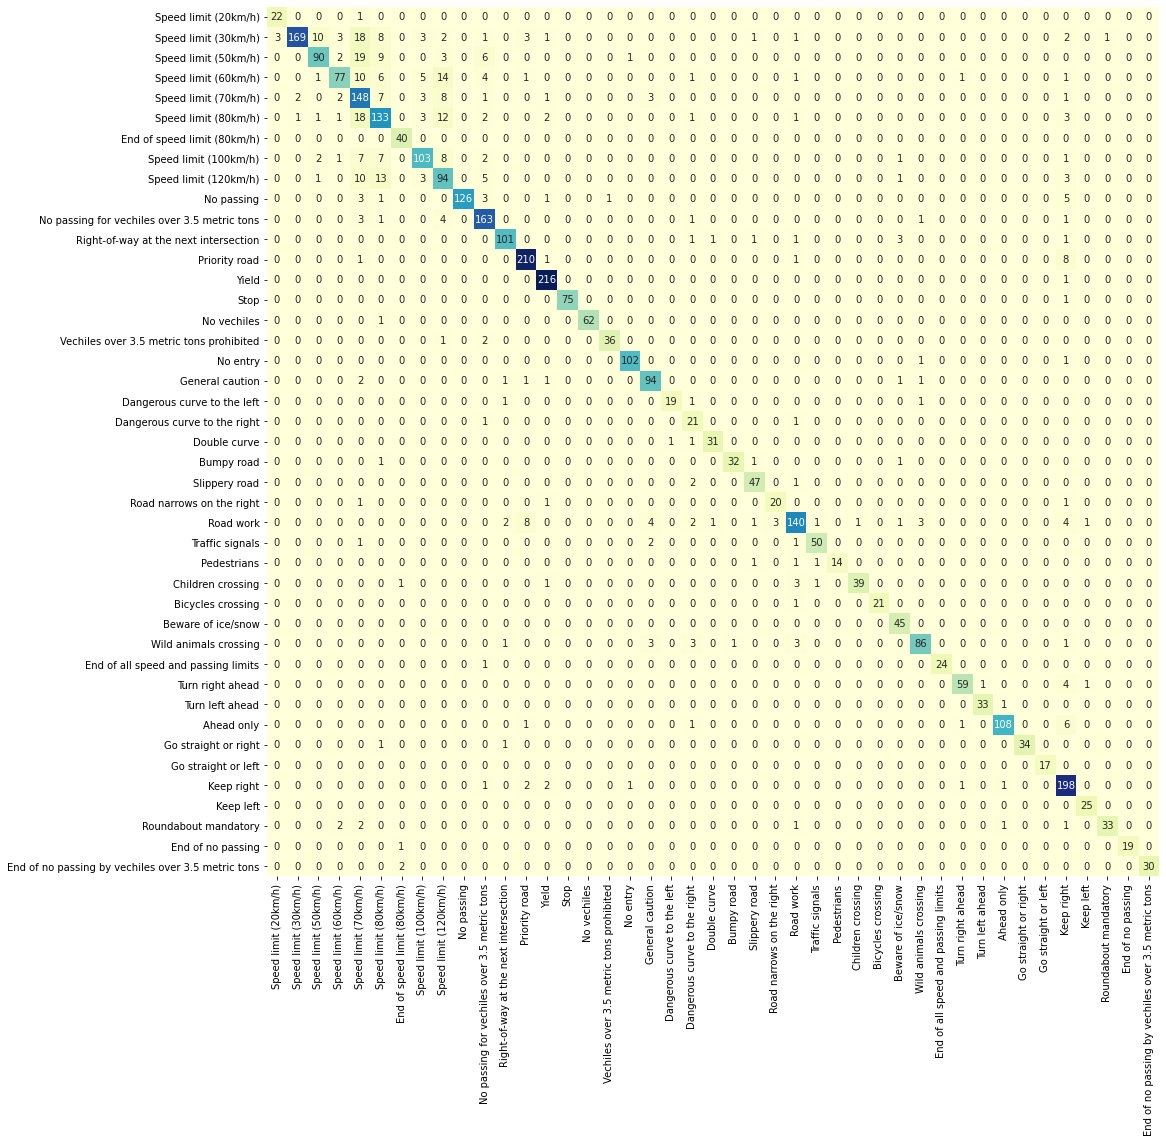

In [170]:
import seaborn as sns
cmat = confusion_matrix(actual, pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=labels, yticklabels=labels);

In [171]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [172]:
actual[3]

40

In [173]:
pred[2]

14

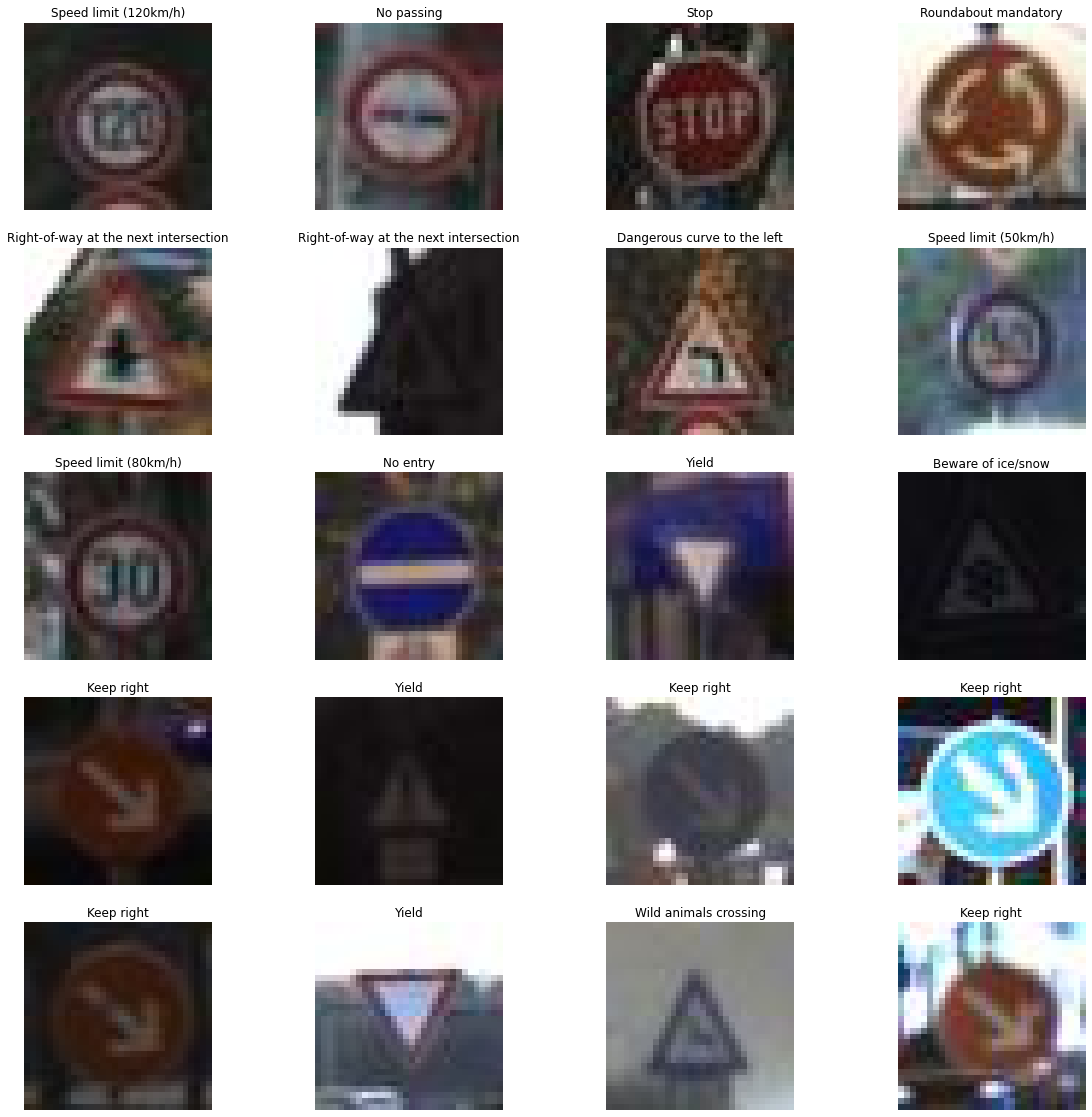

In [192]:
def plot_image(x_test,pred,actual, i,dic):
    image = plt.imshow(x_test[i])
    l=plt.title(dic[pred[i]])
    ax.grid(False)
    ax.axis('off')    
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(x_test,pred,actual, i,dic)

plt.show()

In [175]:
resnet_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (32,32,3))

In [176]:
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation= 'softmax')(x)
model2 = Model(inputs = resnet_model.input, outputs = predictions)

In [177]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [189]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=3
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [190]:
history =  model2.fit(x_train_scaled, y_train_array,validation_data = (x_val_scaled, y_val_array), batch_size =256, epochs =50, verbose = 1, callbacks = [stop, checkpoint])

Epoch 1/50
258/258 [==============================] - 19s 73ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0132 - val_accuracy: 0.9970
Epoch 2/50
258/258 [==============================] - 19s 72ms/step - loss: 0.0098 - accuracy: 0.9980 - val_loss: 0.0460 - val_accuracy: 0.9918
Epoch 3/50
258/258 [==============================] - 19s 72ms/step - loss: 0.0472 - accuracy: 0.9884 - val_loss: 0.0282 - val_accuracy: 0.9945
Epoch 4/50
258/258 [==============================] - 19s 72ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0138 - val_accuracy: 0.9964


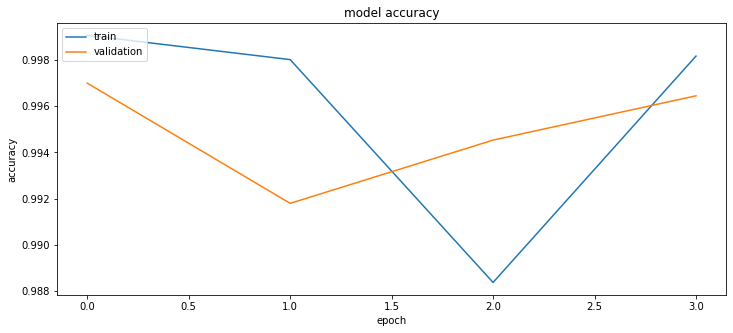

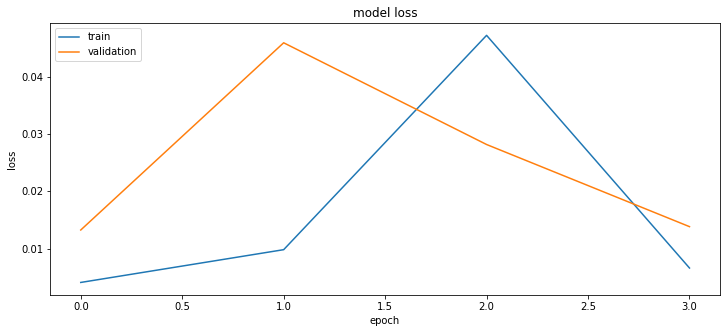

In [194]:
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [195]:
pred2 = np.argmax(model2.predict(x_test_scaled), axis = 1)

In [196]:
actual=np.argmax(y_test_array, axis = 1)

In [199]:
pred2

array([ 8,  9, 14, ..., 15, 12, 12])

In [200]:
actual

array([ 8,  9, 14, ..., 15, 12, 12])

In [209]:
from sklearn.metrics import confusion_matrix, classification_report
labels = [dic[i] for i in range(43)]
print(classification_report(actual, pred2, target_names = labels))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00        23
                              Speed limit (30km/h)       1.00      0.98      0.99       226
                              Speed limit (50km/h)       0.98      1.00      0.99       130
                              Speed limit (60km/h)       0.99      1.00      1.00       122
                              Speed limit (70km/h)       0.99      1.00      1.00       176
                              Speed limit (80km/h)       1.00      0.98      0.99       178
                       End of speed limit (80km/h)       1.00      1.00      1.00        40
                             Speed limit (100km/h)       0.96      0.99      0.97       132
                             Speed limit (120km/h)       1.00      0.99      1.00       130
                                        No passing       1.00      1.00      1.

In [203]:
loss, acc = model2.evaluate(x_test_scaled, y_test_array)
print('Accuracy: ', acc, '\nLoss    : ', loss)

115/115 [==============================] - 2s 13ms/step - loss: 0.0168 - accuracy: 0.9945
Accuracy:  0.9945310354232788 
Loss    :  0.0167534239590168


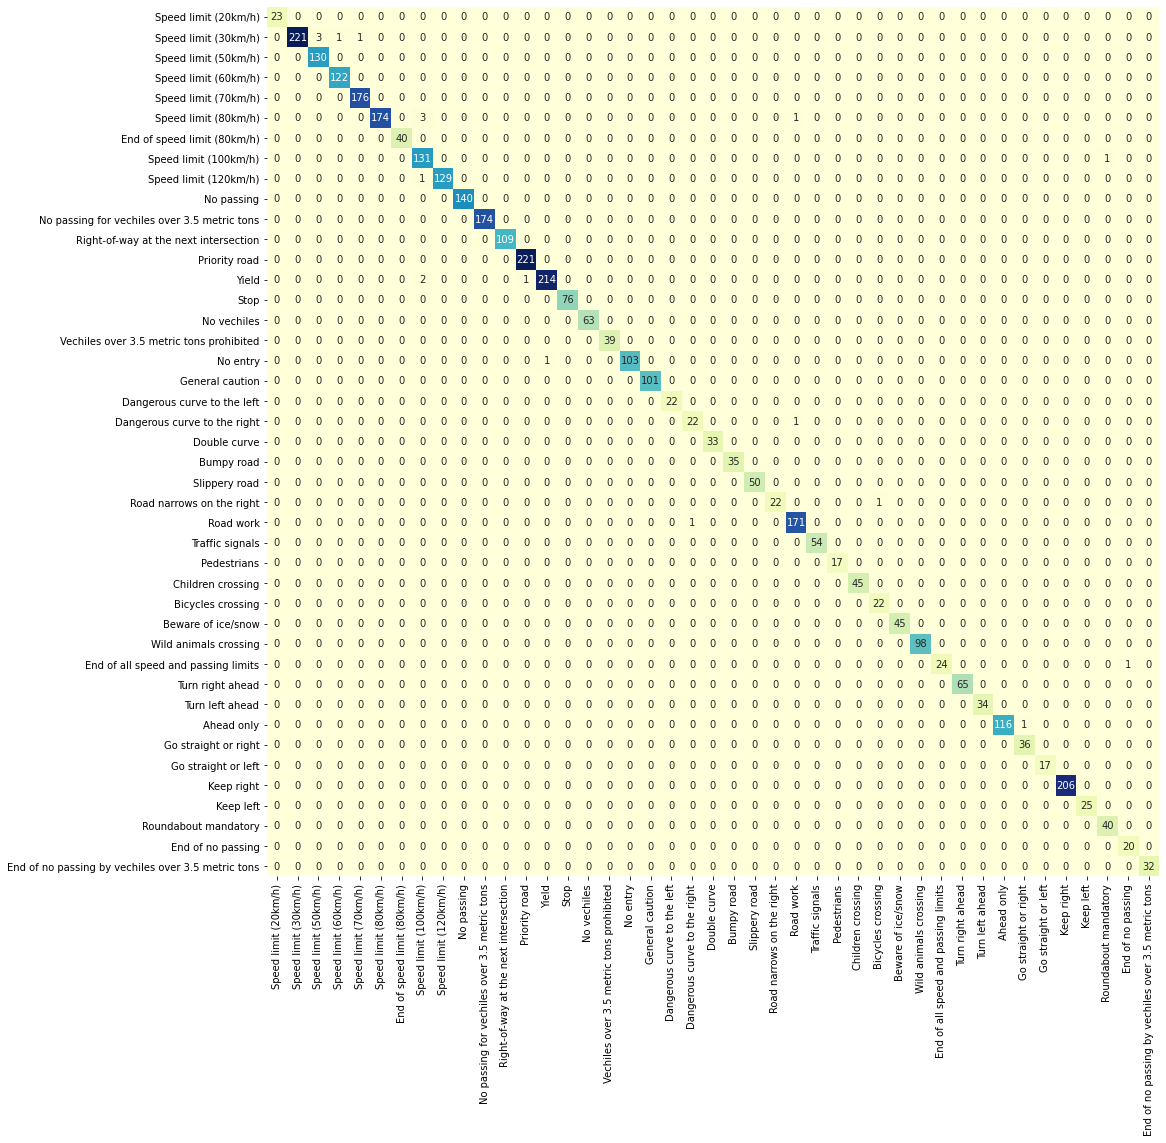

In [208]:
import seaborn as sns
cmat = confusion_matrix(actual, pred2)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=labels, yticklabels=labels);

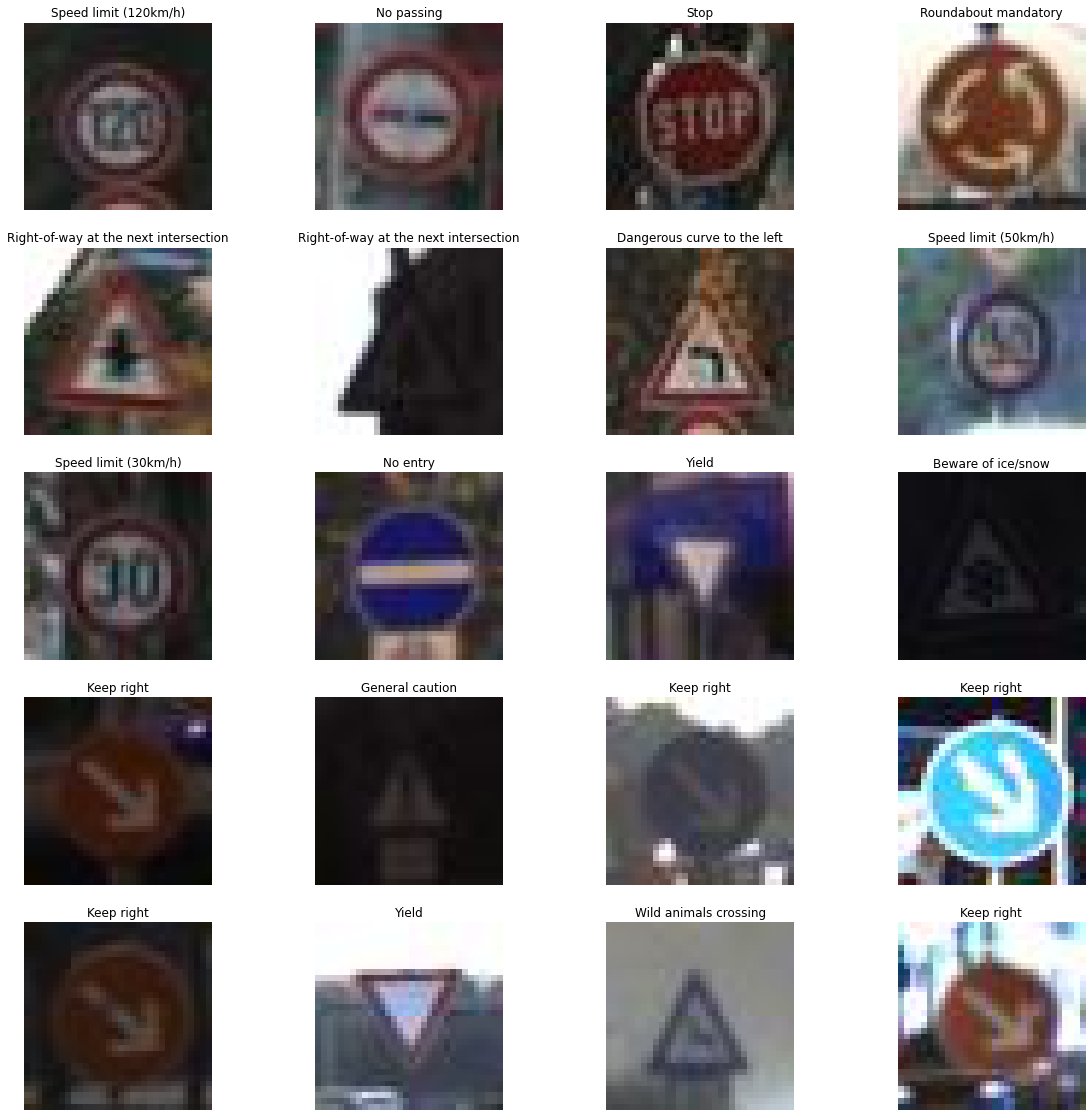

In [210]:
def plot_image(x_test,pred,actual, i,dic):
    image = plt.imshow(x_test[i])
    l=plt.title(dic[pred[i]])
    ax.grid(False)
    ax.axis('off')    
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(x_test,pred2,actual, i,dic)

plt.show()

In [211]:
model2.save("resnet_traffic_sign.h5")